# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd

from string import punctuation
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [2]:
list_sw_punct = StopWordRemoverFactory().get_stop_words() + list(punctuation)

# 2. Extract Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/10. Natural Language Processing/spam.csv')
df.sample(n=100).head()

,Teks,label
923,Mgkin periksa nama id di view jg sep,0
537,Terpilih dapat cek 27jt. KODE TRIPLE CEK ANDA ...,1
16,Anda sedang menikmati Paket Reguler dgn sisa k...,1
35,BONUS KUOTA 500MB (1hr)! Cukup isi ulang min. ...,1
826,Jadi nanti barang yg dipilih nyesuain budget a...,0


# 3. Mini EDA

Text(0.5, 1.0, 'Label Distribution')

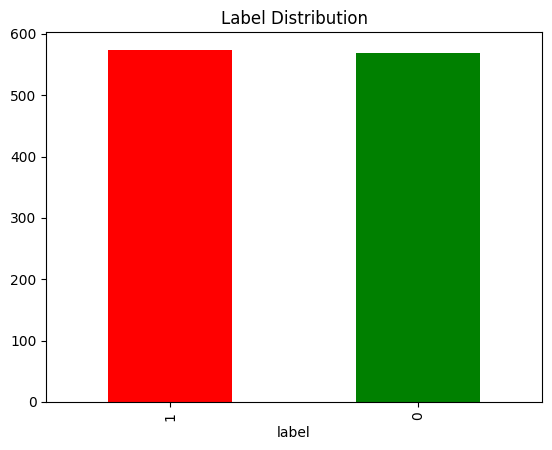

In [4]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar',color=['r','g'])
plt.title('Label Distribution');

## Kata-Kata yang Sering Muncul

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

(-0.5, 399.5, 199.5, -0.5)

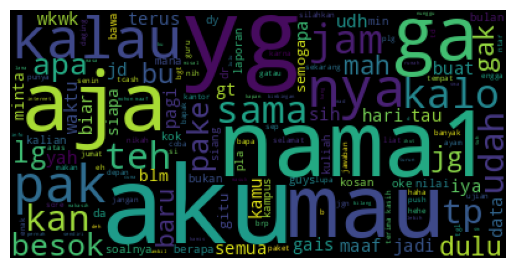

In [21]:
## no spam
all_teks = ' '.join(df[df.label==0]['Teks'].values)
all_teks = word_tokenize(all_teks.lower())
all_teks = [item for item in all_teks if item not in list_sw_punct]
all_teks = ' '.join(all_teks)

wcloud   = WordCloud(random_state=42).generate(all_teks)
plt.imshow(wcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

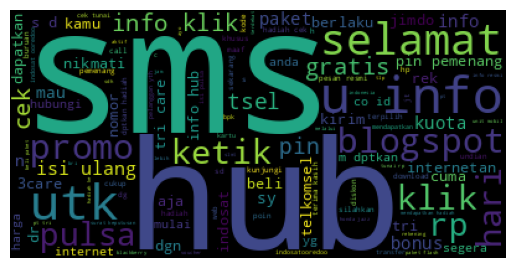

In [22]:
## spam
all_teks = ' '.join(df[df.label==1]['Teks'].values)
all_teks = word_tokenize(all_teks.lower())
all_teks = [item for item in all_teks if item not in list_sw_punct]
all_teks = ' '.join(all_teks)

wcloud   = WordCloud(random_state=42).generate(all_teks)
plt.imshow(wcloud)
plt.axis('off')

In [28]:
from collections import Counter
split_all_teks = all_teks.split(" ")
split_all_teks = Counter(split_all_teks)

# 4. Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df['Teks']
y = df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42,stratify=y)

# 5. Pipeline

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

In [33]:
full_pipeline = Pipeline([("preprocessor",TfidfVectorizer(tokenizer=word_tokenize,
                                                          stop_words=list_sw_punct,
                                                          ngram_range=(1,2))),
                          ("model",LogisticRegression(random_state=42))])

# 6. Training

In [36]:
parameter = {
    'model__C' : [10,1,0.1, 0.001, 0.001],
    'model__fit_intercept':[True,False]
}

In [34]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
model = GridSearchCV(full_pipeline,parameter,cv=5)
model.fit(X_train,y_train)

# 7. Model Performance

In [38]:
from sklearn.metrics import classification_report

In [39]:
def model_performance(model,X,y):
    y_predicted = model.predict(X)
    print(classification_report(y,y_predicted))

In [41]:
model_performance(model,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       114
           1       0.95      1.00      0.97       115

    accuracy                           0.97       229
   macro avg       0.98      0.97      0.97       229
weighted avg       0.98      0.97      0.97       229



# 8. Testing

In [42]:
text_1 = ["Sayng belikan aku pulsa di nmr ini 085212345678 nanti aq tlpn qmu balik, aq pke hp tmn"]
text_2 = ["""TUTUP CC & KTA ANDA, KAMI BANTU DNGN 2 SOLUSI:
             1. CICIL TETAP BUNGA 2%
             2. DISC PELUNASAN 30% S/D 60%
             CLEAR BI & LEGAL
             INFO :
             TELP/WA : SARI 085212345678"""]
text_3 = ["Besok kita masuk kuliah jam 07:30 di gedung A."]
text_4 = ["Anda dapat mobil beneran"]

In [46]:
model.predict_proba(text_4)

array([[0.43698458, 0.56301542]])